# Library Required

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle
import json

In [21]:
df = pd.read_csv('diamonds.csv')

In [22]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


LOADING DATA
Loading Data
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

Feature description:

price price in US dollars ($326--$18,823)This is the target column containing tags for the features. 

The 4 Cs of Diamonds:-

carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

cut (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

Dimensions

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

# Data Preprocessing
Steps involved in Data Preprocessing

Data cleaning
Identifying and removing outliers
Encoding categorical variables

In [23]:
df.shape

(53940, 10)

In [24]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [25]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [26]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Outlier Detection And Remove Outliers

# 1.For Lenght (x)

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x'>

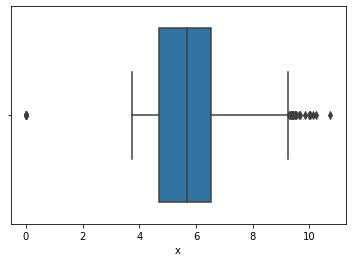

In [27]:
sns.boxplot(df.x)

In [28]:
q1 = df.x.quantile(0.25)

In [29]:
q3 = df.x.quantile(0.75)

In [30]:
iqr = q3-q1

In [31]:
lower_bound = q1-1.5*iqr

In [32]:
lower_bound

1.9649999999999999

In [33]:
upper_bound = q3+1.5*iqr

In [34]:
upper_bound

9.285

In [35]:
df[(df.x<lower_bound)|(df.x>upper_bound)]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
22741,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31
22831,3.00,Good,I,I1,57.0,64.0,10863,9.38,9.31,5.33
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
24131,3.24,Premium,H,I1,62.1,58.0,12300,9.44,9.40,5.85
24297,3.22,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92
24328,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00


In [36]:
def remove_x_outlier(r):
    if r<lower_bound or r>upper_bound:
        return df.x.median()
    else:
        return r

In [37]:
df.x = df.x.map(remove_x_outlier)

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x'>

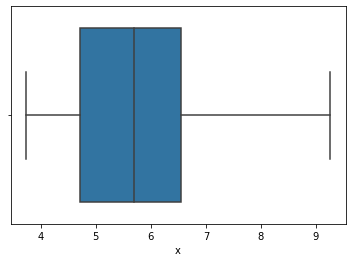

In [38]:
sns.boxplot(df.x)

# 2.For Width (y)

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

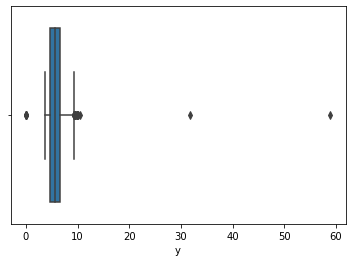

In [39]:
sns.boxplot(df.y)

In [40]:
Q1 = df.y.quantile(0.25)

In [41]:
Q3 = df.y.quantile(0.75)

In [42]:
IQR = Q3-Q1

In [43]:
LowerBound = Q1-1.5*IQR

In [44]:
UpperBound = Q3+1.5*IQR

In [45]:
df[(df.y<LowerBound)|(df.y>UpperBound)]

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,5.70,0.00,0.00
15951,1.14,Fair,G,VS1,57.5,67.0,6381,5.70,0.00,0.00
22741,3.01,Fair,H,I1,56.1,62.0,10761,5.70,9.38,5.31
22831,3.00,Good,I,I1,57.0,64.0,10863,5.70,9.31,5.33
23644,3.65,Fair,H,I1,67.1,53.0,11668,5.70,9.48,6.38
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
24131,3.24,Premium,H,I1,62.1,58.0,12300,5.70,9.40,5.85
24297,3.22,Ideal,I,I1,62.6,55.0,12545,5.70,9.42,5.92
24328,3.50,Ideal,H,I1,62.8,57.0,12587,5.70,9.59,6.03
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,5.70,0.00,0.00


In [46]:
def remove_y_outlier(r):
    if r<LowerBound or r>UpperBound:
        return df.y.median()
    else:
        return r

In [47]:
df.y = df.y.map(remove_y_outlier)

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

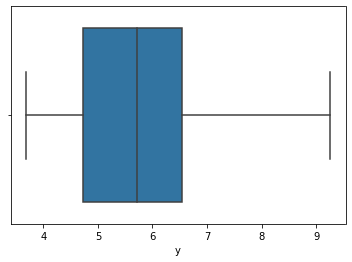

In [48]:
sns.boxplot(df.y)

# 3.For Depth (z)

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='z'>

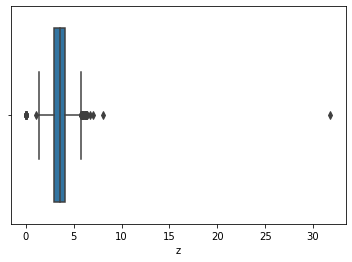

In [49]:
sns.boxplot(df.z)

In [50]:
Qq1 = df.z.quantile(0.25)

In [51]:
Qq3 = df.z.quantile(0.75)

In [52]:
Iqr = Qq3-Qq1

In [53]:
low = Qq1-1.5*Iqr

In [54]:
upp = Qq3+1.5*Iqr

In [55]:
df[(df.z<low)|(df.z>upp)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.00
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.00
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.00
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.00
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.00
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,5.70,6.62,0.00
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,5.70,5.71,0.00
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.00
14635,1.07,Ideal,F,SI1,60.6,57.0,5909,6.62,6.67,1.07
15951,1.14,Fair,G,VS1,57.5,67.0,6381,5.70,5.71,0.00


In [56]:
def remove_z_outlier(r):
    if r<low or r>upp:
        return df.z.median()
    else:
        return r

In [57]:
df.z = df.z.map(remove_z_outlier)

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='z'>

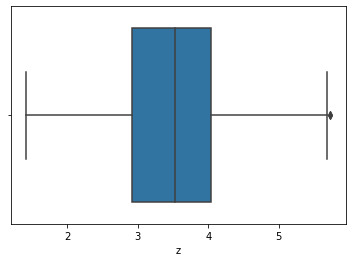

In [58]:
sns.boxplot(df.z)

In [59]:
q1_outlier_z = df.z.quantile(0.25)

In [60]:
q3_outlier_z = df.z.quantile(0.75)

In [61]:
iqr_z = q3_outlier_z-q1_outlier_z

In [62]:
lower_z = q1_outlier_z-1.5*iqr_z

In [63]:
upper_z = q3_outlier_z+1.5*iqr_z

In [64]:
df[(df.z<lower_z)|(df.z>upper_z)]

,carat,cut,color,clarity,depth,table,price,x,y,z
21862,3.01,Premium,F,I1,62.2,56.0,9925,9.24,9.13,5.73
26933,3.00,Fair,I,SI2,64.8,59.0,16970,8.93,8.73,5.72


In [65]:
def remove_outlier_z_again(r):
    if r<lower_z or r>upper_z:
        return df.z.median()
    else:
        return r

In [66]:
df.z = df.z.map(remove_outlier_z_again)

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='z'>

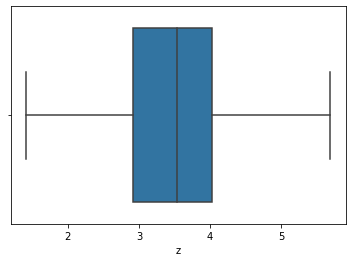

In [67]:
sns.boxplot(df.z)

# 4.For Depth

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='depth'>

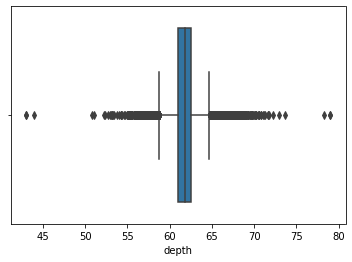

In [68]:
sns.boxplot(df.depth)

In [69]:
qq1 = df.depth.quantile(0.25)

In [70]:
qq3 = df.depth.quantile(0.75)

In [71]:
iQR = qq3-qq1

In [72]:
iQR

1.5

In [73]:
lowB = qq1-1.5*iQR

In [74]:
lowB

58.75

In [75]:
uppB = qq3+1.5*iQR

In [76]:
uppB

64.75

In [77]:
df[(df.depth<lowB)|(df.depth>uppB)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
24,0.31,Very Good,J,SI1,58.1,62.0,353,4.44,4.47,2.59
35,0.23,Good,F,VS1,58.2,59.0,402,4.06,4.08,2.37
42,0.26,Good,D,VS2,65.2,56.0,403,3.99,4.02,2.61
...,...,...,...,...,...,...,...,...,...,...
53882,0.71,Fair,D,VS1,65.4,59.0,2747,5.62,5.58,3.66
53886,0.70,Good,D,VS2,58.0,62.0,2749,5.78,5.87,3.38
53890,0.73,Good,E,SI1,57.9,55.0,2749,6.00,5.96,3.46
53895,0.70,Good,F,VS1,57.8,61.0,2751,5.83,5.79,3.36


In [78]:
def remove_outlier_depth(r):
    if r<lowB or r>uppB:
        return df.depth.median()
    else:
        return r

In [79]:
df.depth.median()

61.8

In [80]:
df.depth = df.depth.map(remove_outlier_depth)

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='depth'>

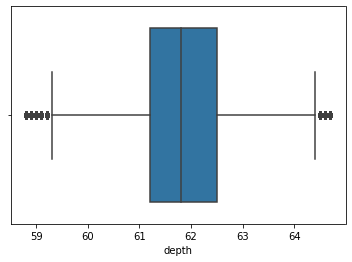

In [81]:
sns.boxplot(df.depth)

In [82]:
q1_depth = df.depth.quantile(0.25)

In [83]:
q3_depth = df.depth.quantile(0.75)

In [84]:
iqr_depth = q3_depth-q1_depth

In [85]:
lower_depth = q1_depth-1.5*iqr_depth

In [86]:
upper_depth = q3_depth+1.5*iqr_depth

In [87]:
df[(df.depth<lower_depth)|(df.depth>upper_depth)]

,carat,cut,color,clarity,depth,table,price,x,y,z
75,0.26,Very Good,F,VVS2,59.2,60.0,554,4.19,4.22,2.49
108,0.81,Ideal,F,SI2,58.8,57.0,2761,6.14,6.11,3.60
123,0.70,Fair,F,VS2,64.5,57.0,2762,5.57,5.53,3.58
160,0.73,Premium,G,VS2,59.2,59.0,2770,5.92,5.87,3.49
169,0.71,Good,E,VS2,59.2,61.0,2772,5.80,5.88,3.46
...,...,...,...,...,...,...,...,...,...,...
53656,0.76,Premium,D,SI2,58.8,57.0,2706,6.03,5.98,3.51
53677,0.71,Premium,E,VS2,59.0,59.0,2711,5.78,5.88,3.44
53697,0.70,Fair,H,VVS2,64.5,65.0,2717,5.52,5.45,3.54
53779,0.74,Very Good,E,SI2,59.1,60.0,2728,5.88,5.93,3.49


In [88]:
def remove_outlier_depth_again(r):
    if r<lower_depth or r>upper_depth:
        return df.depth.median()
    else:
        return r

In [89]:
df.depth = df.depth.map(remove_outlier_depth_again)

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='depth'>

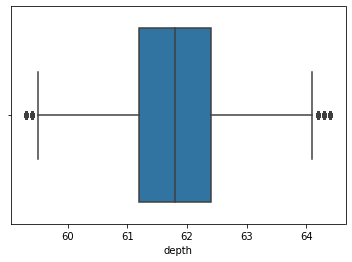

In [90]:
sns.boxplot(df.depth)

In [91]:
q1_depth_ = df.depth.quantile(0.25)

In [92]:
q3_depth_ = df.depth.quantile(0.75)

In [93]:
iqr_depth_ = q3_depth_-q1_depth_

In [94]:
lower_depth_ = q1_depth_-1.5*iqr_depth_

In [95]:
upper_depth_ = q3_depth_+1.5*iqr_depth_

In [96]:
df[(df.depth<lower_depth_)|(df.depth>upper_depth_)]

,carat,cut,color,clarity,depth,table,price,x,y,z
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
23,0.31,Very Good,J,SI1,59.4,62.0,353,4.39,4.43,2.62
54,0.22,Premium,D,VS2,59.3,62.0,404,3.91,3.88,2.31
56,0.30,Premium,J,SI2,59.3,61.0,405,4.43,4.38,2.61
96,0.70,Good,F,VS1,59.4,62.0,2759,5.71,5.76,3.40
...,...,...,...,...,...,...,...,...,...,...
53785,0.89,Good,E,SI2,64.3,65.0,2728,6.00,5.95,3.84
53814,0.77,Good,H,VVS2,64.3,57.9,2734,5.70,5.86,3.71
53897,1.02,Good,H,I1,64.3,63.0,2751,6.28,6.23,4.02
53913,0.80,Good,G,VS2,64.2,58.0,2753,5.84,5.81,3.74


In [97]:
def remove_outlier_depth_again_(r):
    if r<lower_depth_ or r>upper_depth_:
        return df.depth.median()
    else:
        return r

In [98]:
df.depth = df.depth.map(remove_outlier_depth_again_)

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='depth'>

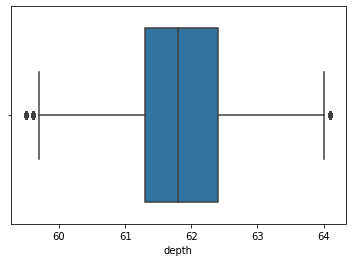

In [99]:
sns.boxplot(df.depth)

In [100]:
q1_out_depth = df.depth.quantile(0.25)

In [101]:
q3_out_depth = df.depth.quantile(0.75)

In [102]:
iqr_depth_again = q3_out_depth-q1_out_depth

In [103]:
low_depth_again = q1_out_depth-1.5*iqr_depth_again

In [104]:
upp_depth_again = q3_out_depth+1.5*iqr_depth_again

In [105]:
df[(df.depth<low_depth_again)|(df.depth>upp_depth_again)]

,carat,cut,color,clarity,depth,table,price,x,y,z
33,0.23,Very Good,E,VS1,59.5,58.0,402,4.01,4.06,2.40
36,0.23,Good,E,VS1,64.1,59.0,402,3.83,3.85,2.46
127,0.61,Very Good,D,VVS2,59.6,57.0,2763,5.56,5.58,3.32
203,0.70,Good,E,VS2,64.1,59.0,2777,5.64,5.59,3.60
268,0.76,Premium,H,VVS2,59.6,57.0,2792,5.91,5.86,3.51
...,...,...,...,...,...,...,...,...,...,...
53649,1.05,Very Good,J,I1,59.6,63.0,2705,6.61,6.55,3.92
53696,0.70,Premium,H,VVS2,59.6,59.0,2717,5.83,5.78,3.46
53758,0.72,Very Good,F,VS2,59.6,63.0,2724,5.92,5.75,3.48
53804,0.72,Premium,E,SI1,59.5,59.0,2732,5.87,5.83,3.48


In [106]:
def remove_outlier_depth_again_second(r):
    if r<low_depth_again or r>upp_depth_again:
        return df.depth.median()
    else:
        return r

In [107]:
df.depth = df.depth.map(remove_outlier_depth_again_second)

In [108]:
df.depth.median()

61.8

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='depth'>

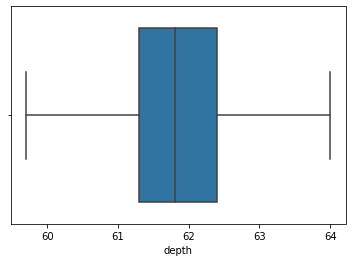

In [109]:
sns.boxplot(df.depth)

# 5.For Table

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='table'>

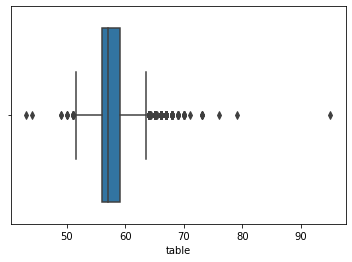

In [110]:
sns.boxplot(df.table)

In [111]:
q1_table = df.table.quantile(0.25)

In [112]:
q3_table = df.table.quantile(0.75)

In [113]:
iqr_table = q3_table-q1_table

In [114]:
lower_table = q1_table-1.5*iqr_table

In [115]:
upper_table = q3_table+1.5*iqr_table

In [116]:
df[(df.table<lower_table)|(df.table>upper_table)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,61.8,65.0,327,4.05,4.07,2.31
91,0.86,Fair,E,SI2,61.8,69.0,2757,6.45,6.33,3.52
145,0.70,Good,H,VVS2,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,Very Good,D,VVS2,61.8,64.0,2782,5.34,5.37,3.08
227,0.84,Fair,G,SI1,61.8,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...,...,...,...
53695,0.75,Good,E,VS2,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,Fair,H,VVS2,61.8,65.0,2717,5.52,5.45,3.54
53756,0.84,Fair,G,VS1,61.8,64.0,2724,6.42,6.32,3.54
53757,0.72,Fair,F,VS2,61.8,64.0,2724,6.06,5.97,3.34


In [117]:
def remove_outlier_table(r):
    if r<lower_table or r>upper_table:
        return df.table.median()
    else:
        return r

In [118]:
df.table = df.table.map(remove_outlier_table)

In [119]:
df.table.median()

57.0

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='table'>

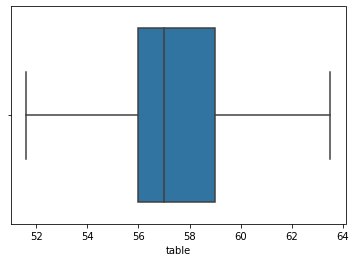

In [120]:
sns.boxplot(df.table)

# Catogorical Data Representation

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

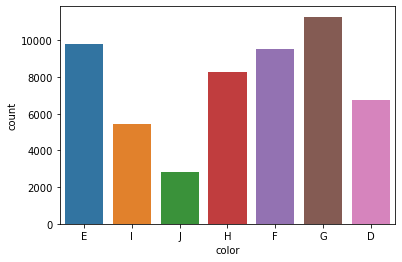

In [121]:
sns.countplot(df.color)

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cut', ylabel='count'>

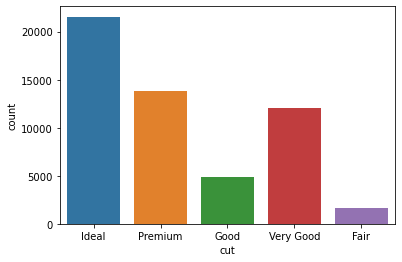

In [122]:
sns.countplot(df.cut)

C:\Users\ibrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity', ylabel='count'>

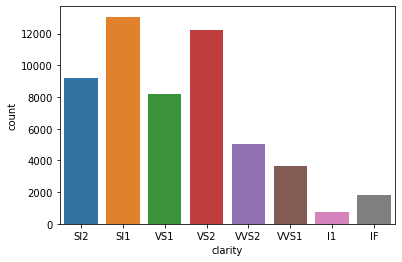

In [123]:
sns.countplot(df.clarity)

# Convert USD Price In IND Currency

In [124]:
df.price = df.price.map(lambda x:x*82.30)

In [125]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,26829.8,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,26829.8,3.89,3.84,2.31
2,0.23,Good,E,VS1,61.8,57.0,26912.1,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,27488.2,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,27570.5,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,226901.1,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,226901.1,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,226901.1,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,226901.1,6.15,6.12,3.74


In [126]:
sorted(df.cut.unique())

['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

# Encoding Catogrical Data

1.cut

In [128]:
encoding_cut = OrdinalEncoder().fit_transform(df[['cut']])

In [129]:
df_cut = pd.DataFrame(encoding_cut)

In [130]:
df_cut

,0
0,2.0
1,3.0
2,1.0
3,3.0
4,1.0
...,...
53935,2.0
53936,1.0
53937,4.0
53938,3.0


In [131]:
df.insert(loc=1,column='CUT',value=df_cut)

In [132]:
df

,carat,CUT,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2.0,Ideal,E,SI2,61.5,55.0,26829.8,3.95,3.98,2.43
1,0.21,3.0,Premium,E,SI1,59.8,61.0,26829.8,3.89,3.84,2.31
2,0.23,1.0,Good,E,VS1,61.8,57.0,26912.1,4.05,4.07,2.31
3,0.29,3.0,Premium,I,VS2,62.4,58.0,27488.2,4.20,4.23,2.63
4,0.31,1.0,Good,J,SI2,63.3,58.0,27570.5,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2.0,Ideal,D,SI1,60.8,57.0,226901.1,5.75,5.76,3.50
53936,0.72,1.0,Good,D,SI1,63.1,55.0,226901.1,5.69,5.75,3.61
53937,0.70,4.0,Very Good,D,SI1,62.8,60.0,226901.1,5.66,5.68,3.56
53938,0.86,3.0,Premium,H,SI2,61.0,58.0,226901.1,6.15,6.12,3.74


2.color

In [133]:
sorted(df.color.unique())

['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [134]:
ordinal_color = OrdinalEncoder().fit_transform(df[['color']])

In [135]:
df_color = pd.DataFrame(ordinal_color)

In [136]:
df_color

,0
0,1.0
1,1.0
2,1.0
3,5.0
4,6.0
...,...
53935,0.0
53936,0.0
53937,0.0
53938,4.0


In [137]:
df.insert(loc=2,column='COLOR',value=df_color)

In [138]:
df

,carat,CUT,COLOR,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2.0,1.0,Ideal,E,SI2,61.5,55.0,26829.8,3.95,3.98,2.43
1,0.21,3.0,1.0,Premium,E,SI1,59.8,61.0,26829.8,3.89,3.84,2.31
2,0.23,1.0,1.0,Good,E,VS1,61.8,57.0,26912.1,4.05,4.07,2.31
3,0.29,3.0,5.0,Premium,I,VS2,62.4,58.0,27488.2,4.20,4.23,2.63
4,0.31,1.0,6.0,Good,J,SI2,63.3,58.0,27570.5,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2.0,0.0,Ideal,D,SI1,60.8,57.0,226901.1,5.75,5.76,3.50
53936,0.72,1.0,0.0,Good,D,SI1,63.1,55.0,226901.1,5.69,5.75,3.61
53937,0.70,4.0,0.0,Very Good,D,SI1,62.8,60.0,226901.1,5.66,5.68,3.56
53938,0.86,3.0,4.0,Premium,H,SI2,61.0,58.0,226901.1,6.15,6.12,3.74


3.clarity

In [139]:
sorted(df.clarity.unique())

['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']

In [140]:
ordinal_clarity = OrdinalEncoder().fit_transform(df[['clarity']])

In [141]:
df_clarity = pd.DataFrame(ordinal_clarity)

In [142]:
df.insert(loc=3,column='CLARITY',value=df_clarity)

In [143]:
df

,carat,CUT,COLOR,CLARITY,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2.0,1.0,3.0,Ideal,E,SI2,61.5,55.0,26829.8,3.95,3.98,2.43
1,0.21,3.0,1.0,2.0,Premium,E,SI1,59.8,61.0,26829.8,3.89,3.84,2.31
2,0.23,1.0,1.0,4.0,Good,E,VS1,61.8,57.0,26912.1,4.05,4.07,2.31
3,0.29,3.0,5.0,5.0,Premium,I,VS2,62.4,58.0,27488.2,4.20,4.23,2.63
4,0.31,1.0,6.0,3.0,Good,J,SI2,63.3,58.0,27570.5,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2.0,0.0,2.0,Ideal,D,SI1,60.8,57.0,226901.1,5.75,5.76,3.50
53936,0.72,1.0,0.0,2.0,Good,D,SI1,63.1,55.0,226901.1,5.69,5.75,3.61
53937,0.70,4.0,0.0,2.0,Very Good,D,SI1,62.8,60.0,226901.1,5.66,5.68,3.56
53938,0.86,3.0,4.0,3.0,Premium,H,SI2,61.0,58.0,226901.1,6.15,6.12,3.74


In [144]:
df.drop(['cut','color','clarity'],axis=1,inplace=True)

In [145]:
df

,carat,CUT,COLOR,CLARITY,depth,table,price,x,y,z
0,0.23,2.0,1.0,3.0,61.5,55.0,26829.8,3.95,3.98,2.43
1,0.21,3.0,1.0,2.0,59.8,61.0,26829.8,3.89,3.84,2.31
2,0.23,1.0,1.0,4.0,61.8,57.0,26912.1,4.05,4.07,2.31
3,0.29,3.0,5.0,5.0,62.4,58.0,27488.2,4.20,4.23,2.63
4,0.31,1.0,6.0,3.0,63.3,58.0,27570.5,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2.0,0.0,2.0,60.8,57.0,226901.1,5.75,5.76,3.50
53936,0.72,1.0,0.0,2.0,63.1,55.0,226901.1,5.69,5.75,3.61
53937,0.70,4.0,0.0,2.0,62.8,60.0,226901.1,5.66,5.68,3.56
53938,0.86,3.0,4.0,3.0,61.0,58.0,226901.1,6.15,6.12,3.74


In [146]:
df.rename(columns={'CUT':'cut','COLOR':'color','CLARITY':'clarity'},inplace=True)

In [147]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2.0,1.0,3.0,61.5,55.0,26829.8,3.95,3.98,2.43
1,0.21,3.0,1.0,2.0,59.8,61.0,26829.8,3.89,3.84,2.31
2,0.23,1.0,1.0,4.0,61.8,57.0,26912.1,4.05,4.07,2.31
3,0.29,3.0,5.0,5.0,62.4,58.0,27488.2,4.20,4.23,2.63
4,0.31,1.0,6.0,3.0,63.3,58.0,27570.5,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2.0,0.0,2.0,60.8,57.0,226901.1,5.75,5.76,3.50
53936,0.72,1.0,0.0,2.0,63.1,55.0,226901.1,5.69,5.75,3.61
53937,0.70,4.0,0.0,2.0,62.8,60.0,226901.1,5.66,5.68,3.56
53938,0.86,3.0,4.0,3.0,61.0,58.0,226901.1,6.15,6.12,3.74


# co-relation between dependent and independent features

<Figure size 1440x504 with 0 Axes>

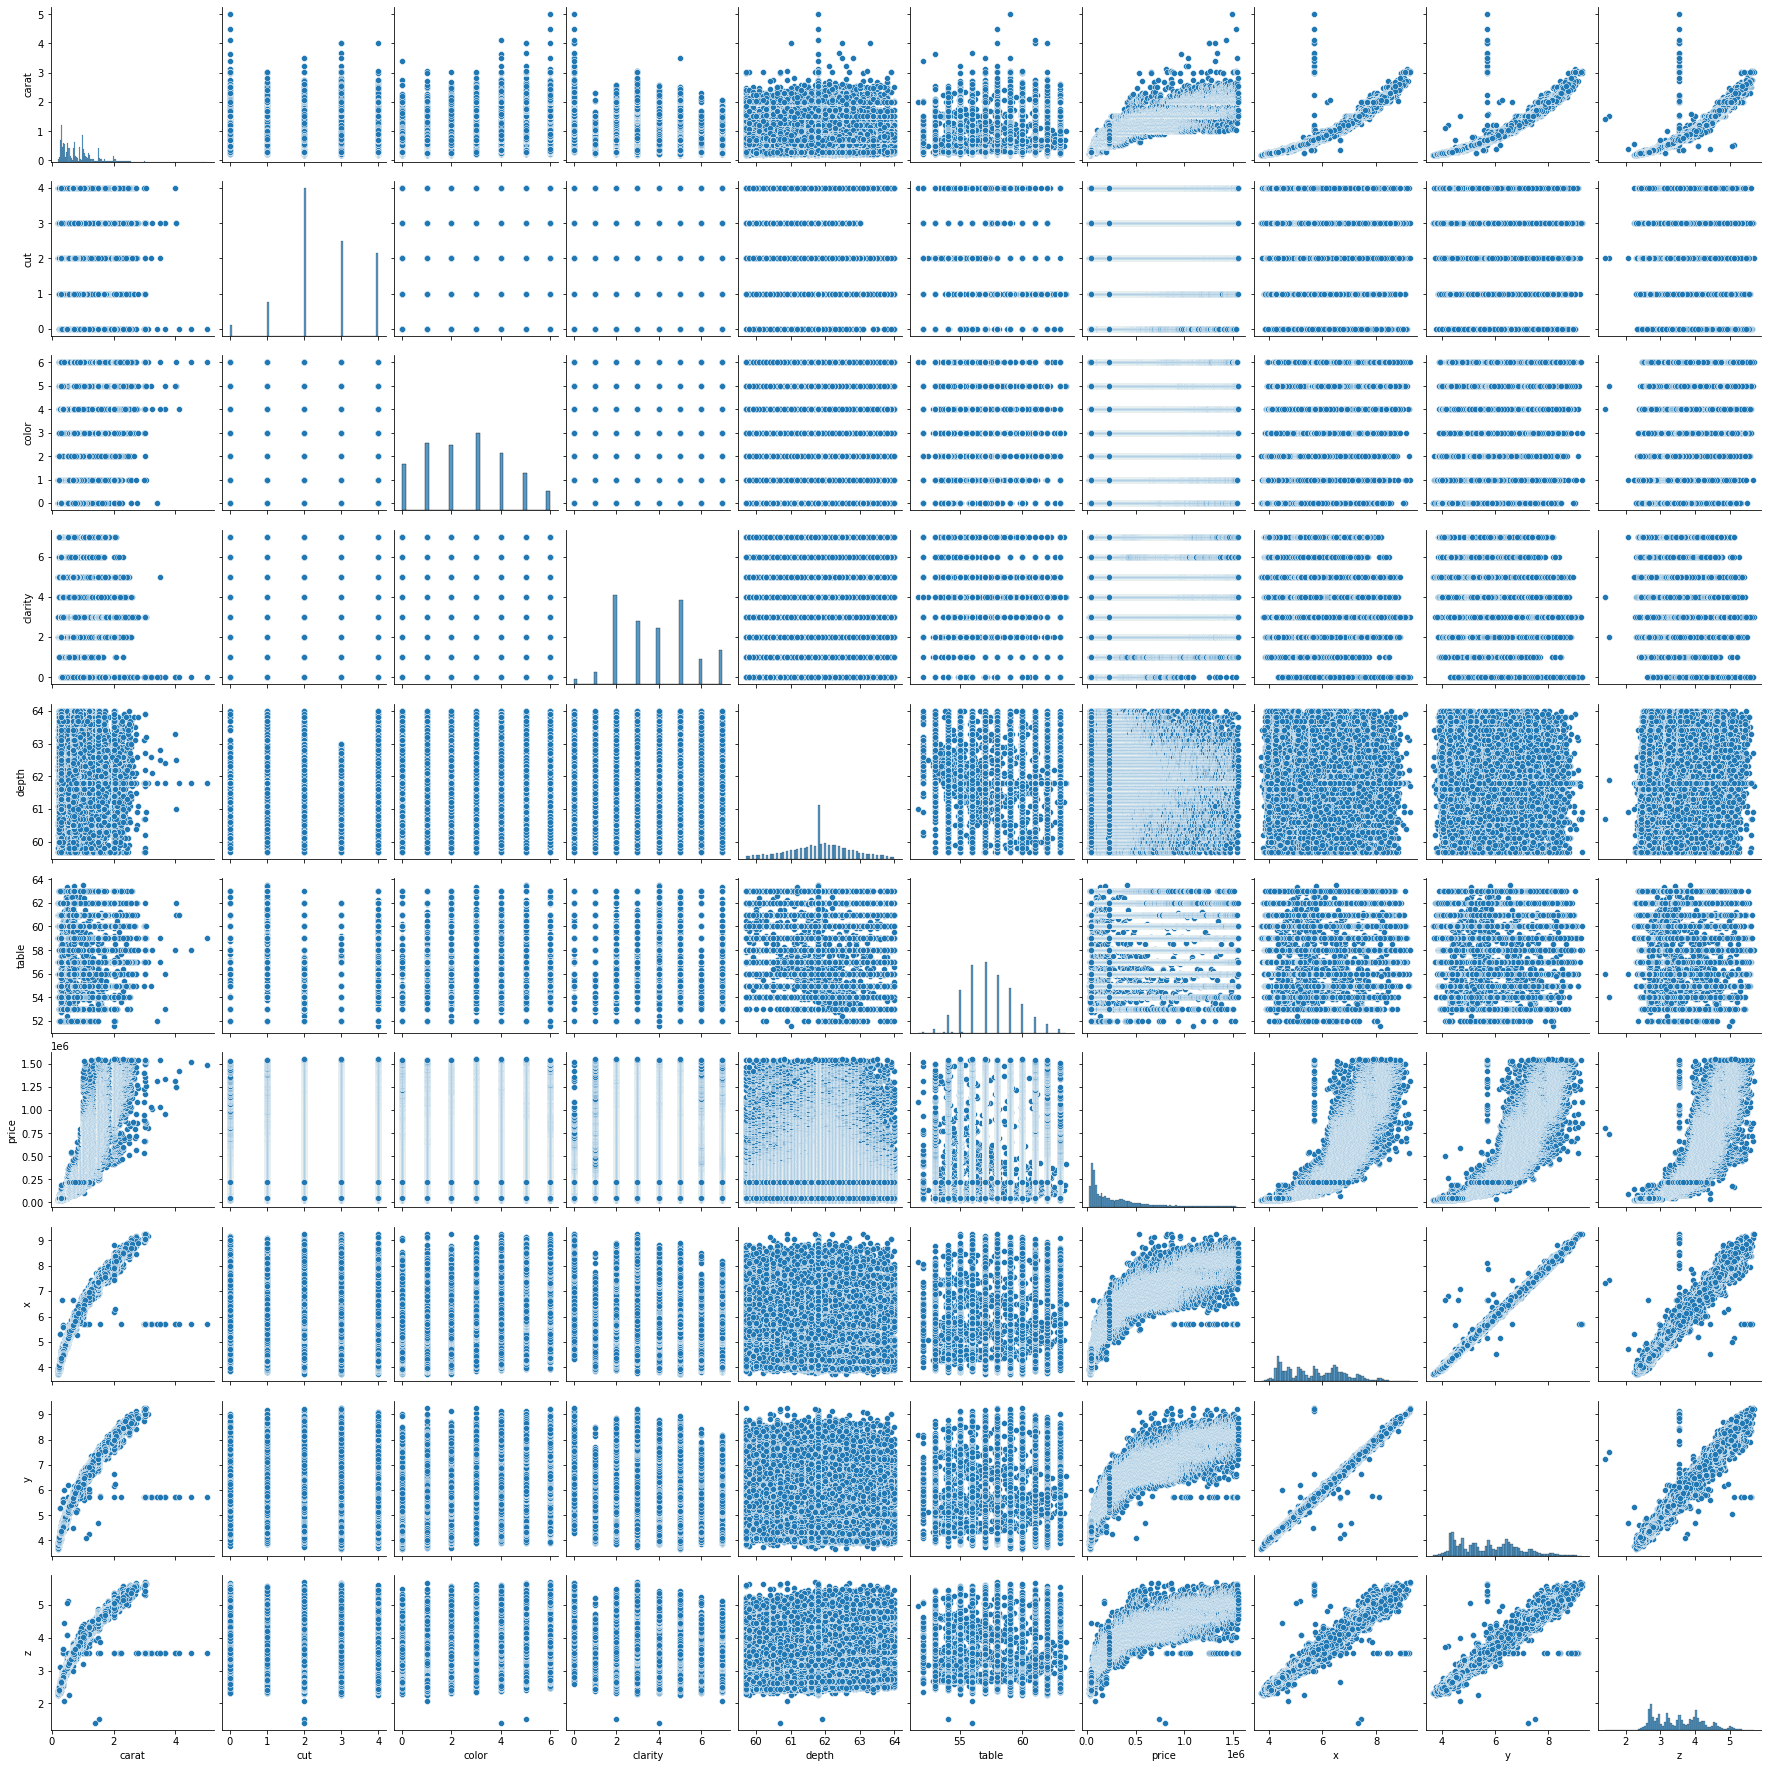

In [148]:
plt.figure(figsize=(20,7))
sns.pairplot(df)

<AxesSubplot:>

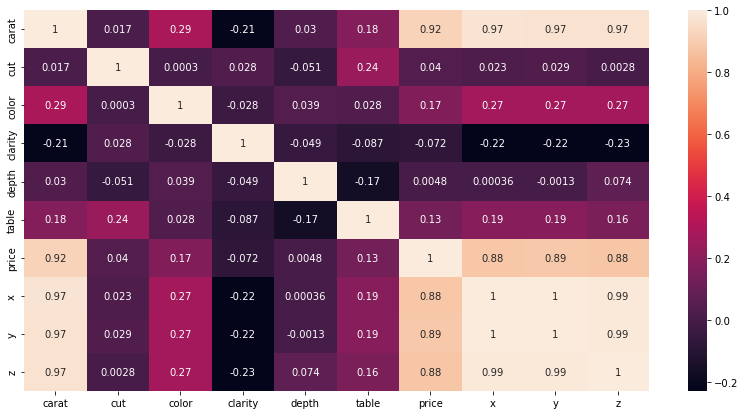

In [149]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)

# Splitting Target Data 

In [150]:
X = df.drop('price',axis=1)

In [151]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2.0,1.0,3.0,61.5,55.0,3.95,3.98,2.43
1,0.21,3.0,1.0,2.0,59.8,61.0,3.89,3.84,2.31
2,0.23,1.0,1.0,4.0,61.8,57.0,4.05,4.07,2.31
3,0.29,3.0,5.0,5.0,62.4,58.0,4.20,4.23,2.63
4,0.31,1.0,6.0,3.0,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2.0,0.0,2.0,60.8,57.0,5.75,5.76,3.50
53936,0.72,1.0,0.0,2.0,63.1,55.0,5.69,5.75,3.61
53937,0.70,4.0,0.0,2.0,62.8,60.0,5.66,5.68,3.56
53938,0.86,3.0,4.0,3.0,61.0,58.0,6.15,6.12,3.74


In [152]:
y = df.price

In [153]:
y

0         26829.8
1         26829.8
2         26912.1
3         27488.2
4         27570.5
           ...   
53935    226901.1
53936    226901.1
53937    226901.1
53938    226901.1
53939    226901.1
Name: price, Length: 53940, dtype: float64

# Test And Train Data Split

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=30)

# Model Building

# 1.Linear Regression

In [156]:
model_linear = LinearRegression()

In [157]:
model_linear.fit(X_train,y_train)

LinearRegression()

In [158]:
model_linear.score(X_train,y_train)

0.8825545498986079

In [159]:
model_linear.score(X_test,y_test)

0.8798332390683953

# 2.Decision Tree Regressor

In [160]:
model_dt = DecisionTreeRegressor()

In [161]:
model_dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [162]:
model_dt.score(X_train,y_train)

0.9999970553597239

In [163]:
model_dt.score(X_test,y_test)

0.9637589434827936

# 3.Random Forest Regressor

In [164]:
model_rf = RandomForestRegressor()

In [165]:
model_rf.fit(X_train,y_train)

RandomForestRegressor()

In [166]:
model_rf.score(X_train,y_train)

0.9973379301876772

In [167]:
model_rf.score(X_test,y_test)

0.9805421331427929

# Save Model In Pickle and Json File

In [168]:
with open('Diamond_model_rf.pickle','wb') as fp:
    pickle.dump(model_rf,fp)

In [169]:
columns = X.columns

In [170]:
projected_data = {'columns':columns.to_list(),
                 'cut':{'Fair':0,'Good':1,'Ideal':2,'Premium':3,'Very Good':4},
                 'color':{'D':0,'E':1,'F':2,'G':3,'H':4,'I':5,'J':6},
                 'clarity':{'I1':0,'IF':1,'SI1':2,'SI2':3,'VS1':4,'VS2':5,'VVS1':6,'VVS2':7}}

In [171]:
with open('projected_data_diamond.json','w') as fp:
    json.dump(projected_data,fp)

In [ ]:
########################################################## end of program ######################################################